**Introduction to k-Nearest Neighbors (kNN)**

k-Nearest Neighbors (kNN) is a simple and widely used classification and regression algorithm in machine learning. It is a non-parametric and lazy learning algorithm, meaning it does not make any assumptions about the underlying data distribution and doesn't build a specific model during training. Instead, it memorizes the entire training dataset and makes predictions based on the proximity of the data points to the input.

The basic idea behind kNN is to classify a new data point by looking at the k closest data points (nearest neighbors) in the training dataset. In classification problems, the majority class among the k-nearest neighbors is assigned to the new data point. For regression tasks, the output is the average (or weighted average) of the k-nearest neighbors' target values.

kNN is often used as a baseline algorithm and can work well in certain scenarios, especially when the decision boundary is not highly complex or the dataset is not very large.

**Theoretical Understanding of kNN**

**I. Distance Metrics**

The choice of distance metric is crucial in the kNN algorithm. Common distance metrics include:

**1. Euclidean Distance:** It is the straight-line distance between two points in Euclidean space.

**2. Manhattan Distance (L1 norm):** It is the sum of absolute differences between the coordinates of two points.

**3. Minkowski Distance (generalization of Euclidean and Manhattan distances):** It is defined as the Lp norm of the differences between two points' coordinates. See [here](https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/) for information on the types of distance metrics in machine learning.

**II. Choosing the Value of k**

The value of k, the number of nearest neighbors to consider, affects the model's performance. A small value of k (e.g., 1) may lead to a noisy model, while a large value of k may result in a biased model. The optimal k value should be determined through "the elbow method", cross-validation or other model evaluation techniques.

**III. Handling Ties**

In classification problems with an even value of k, there might be ties for the majority class. This can be addressed by using weighted voting or considering different k values until a clear majority is obtained.

**IV. Data Scaling**

Since kNN relies on distance measures, it is essential to scale the data to prevent features with larger scales from dominating the distance calculations.

**Implementation of kNN in Python**

Let's implement the k-Nearest Neighbors algorithm step-by-step in Python using the popular libraries NumPy and Scikit-learn.

**Step 1: Import Libraries**

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


**Step 2: Load and Prepare Data**

For this tutorial, we will use the Iris dataset from Scikit-learn. We will load the dataset, split it into training and testing sets, and then scale the features using `StandardScaler.`

In [2]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Step 3: Implement the kNN Algorithm**

Now, we will implement the kNN algorithm from scratch. For simplicity, we'll use the Euclidean distance metric.

In [3]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        # Calculate distances from the test point to all training points
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]

        # Get the indices of the k-nearest neighbors
        k_indices = np.argsort(distances)[:k]

        # Get the corresponding labels of the k-nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices]

        # Perform majority voting to get the predicted label for the test point
        y_pred.append(max(k_nearest_labels, key=k_nearest_labels.count))

    return y_pred


**Step 4: Make Predictions and Evaluate the Model**

Let's use our implemented kNN algorithm to make predictions and evaluate the model's performance.

In [4]:
# Define the value of k
k = 5

# Make predictions using our kNN algorithm


y_pred = knn_predict(X_train, y_train, X_test, k)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


**The Elbow Method:**

The elbow method is a graphical technique used to find the optimal value of k (the number of nearest neighbors) in the k-Nearest Neighbors (kNN) algorithm. It involves plotting the model's performance (e.g., accuracy, error) against different values of k and looking for the "elbow point" in the graph. The elbow point is the value of k where the performance stabilizes or starts to decrease. It represents the optimal balance between model complexity and performance.

After running the code, you will get a plot showing the accuracy of the kNN model for different values of k. The optimal k value will be at the "elbow point," where the accuracy stabilizes or starts to decrease. This point represents the best trade-off between model complexity and performance.

In the plot, look for the value of k where the accuracy is relatively high and further increasing k doesn't significantly improve the accuracy. That value of k is the optimal choice for your kNN model.

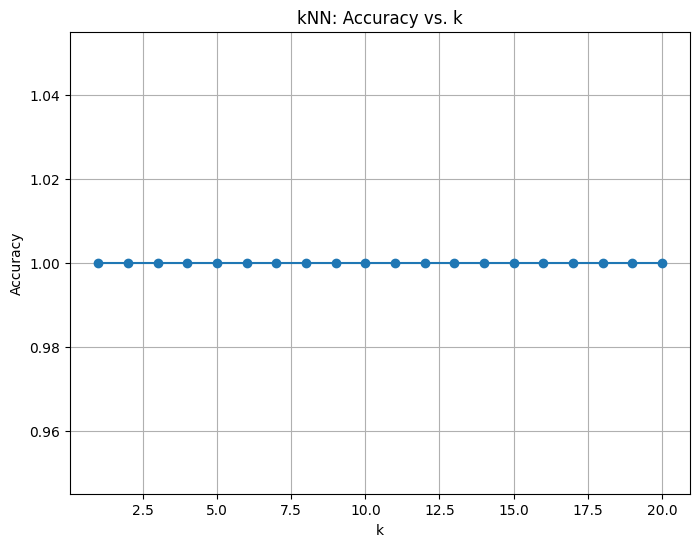

In [6]:
import matplotlib.pyplot as plt


def calculate_accuracy_for_k(X_train, y_train, X_test, y_test, k):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Define a range of k values to test
k_values = list(range(1, 21))

# Calculate accuracy for each k value
accuracies = []
for k in k_values:
    accuracy = calculate_accuracy_for_k(X_train, y_train, X_test, y_test, k)
    accuracies.append(accuracy)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('kNN: Accuracy vs. k')
plt.grid(True)
plt.show()


**Step 5: Using Scikit-learn's kNN Implementation**

Scikit-learn provides a powerful kNN implementation, making it much more convenient to use. Let's see how we can achieve the same results using Scikit-learn.

In [7]:
# Create a kNN classifier using Scikit-learn
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_sklearn = knn_classifier.predict(X_test)

# Calculate accuracy using Scikit-learn's accuracy_score function
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Accuracy (Scikit-learn): {accuracy_sklearn:.2f}")


Accuracy (Scikit-learn): 1.00
